# EDA

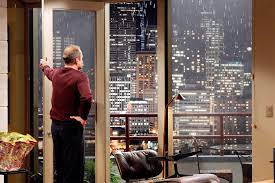

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#import the data from a csv-file
sales_df = pd.read_csv('data/eda_house_sales.csv')

In [ ]:
sales_df

In [4]:
details_df = pd.read_csv('data/eda_house_details.csv')

In [5]:
details_df

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0         1000102     6.000      3.000     2400.000  9373.000   2.000   
1       100100050     3.000      1.000     1320.000 11090.000   1.000   
2      1001200035     3.000      1.000     1350.000  7973.000   1.500   
3      1001200050     4.000      1.500     1260.000  7248.000   1.500   
4      1003000175     3.000      1.000      980.000  7606.000   1.000   
...           ...       ...        ...          ...       ...     ...   
21415   993002177     3.000      2.500     1380.000  1547.000   3.000   
21416   993002225     3.000      2.250     1520.000  1245.000   3.000   
21417   993002247     3.000      2.250     1550.000  1469.000   3.000   
21418   993002325     2.000      1.500      950.000  4625.000   1.000   
21419   999000215     4.000      2.500     2760.000  5000.000   1.500   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0             NaN 0.000          3      7    2400.000          0.000   
1           0.000 0.000          3      7    1320.000          0.000   
2             NaN 0.000          3      7    1350.000          0.000   
3             NaN 0.000          5      7    1260.000          0.000   
4           0.000 0.000          3      7     980.000          0.000   
...           ...   ...        ...    ...         ...            ...   
21415       0.000 0.000          3      8    1380.000          0.000   
21416         NaN 0.000          3      8    1520.000          0.000   
21417       0.000 0.000          3      8    1550.000          0.000   
21418       0.000 0.000          4      7     950.000          0.000   
21419       0.000 0.000          5      7    1680.000       1080.000   

       yr_built  yr_renovated  zipcode    lat     long  sqft_living15  \
0          1991         0.000    98002 47.326 -122.214       2060.000   
1          1955         0.000    98155 47.775 -122.304       1320.000   
2          1954         0.000    98188 47.432 -122.292       1310.000   
3          1955           NaN    98188 47.433 -122.292       1300.000   
4          1954         0.000    98188 47.436 -122.290        980.000   
...         ...           ...      ...    ...      ...            ...   
21415      2000           NaN    98103 47.691 -122.341       1380.000   
21416      2004         0.000    98103 47.691 -122.340       1520.000   
21417      2004         0.000    98103 47.691 -122.341       1520.000   
21418      1949           NaN    98103 47.691 -122.340       1440.000   
21419      1928         0.000    98107 47.673 -122.371       1850.000   

       sqft_lot15  
0        7316.000  
1        8319.000  
2        7491.000  
3        7732.000  
4        8125.000  
...           ...  
21415    1465.000  
21416    1470.000  
21417    1465.000  
21418    4625.000  
21419    5000.000  

[21420 rows x 19 columns]

In [6]:
# Merge the datasets using a left join to retain all house details
merged_df = pd.merge(details_df, sales_df, left_on="id", right_on="house_id", how="outer", suffixes=('_details','_sales'))



# Display the first few rows to verify
merged_df.head(10)



id_details  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0     1000102     6.000      3.000     2400.000  9373.000   2.000         NaN   
1     1000102     6.000      3.000     2400.000  9373.000   2.000         NaN   
2     1200019     4.000      1.750     2060.000 26036.000   1.000         NaN   
3     1200021     3.000      1.000     1460.000 43000.000   1.000       0.000   
4     2800031     3.000      1.000     1430.000  7599.000   1.500       0.000   
5     3600057     4.000      2.000     1650.000  3504.000   1.000       0.000   
6     3600072     4.000      2.750     2220.000  5310.000   1.000         NaN   
7     3800008     5.000      1.500     1990.000 18200.000   1.000         NaN   
8     5200087     4.000      2.500     2540.000  5001.000   2.000       0.000   
9     6200017     3.000      1.000     1340.000 21336.000   1.500       0.000   

   view  condition  grade  ...  yr_renovated  zipcode    lat     long  \
0 0.000          3      7  ...         0.000    98002 47.326 -122.214   
1 0.000          3      7  ...         0.000    98002 47.326 -122.214   
2 0.000          4      8  ...         0.000    98166 47.444 -122.351   
3 0.000          3      7  ...         0.000    98166 47.443 -122.347   
4 0.000          4      6  ...         0.000    98168 47.478 -122.265   
5 0.000          3      7  ...     20130.000    98144 47.580 -122.294   
6 0.000          5      7  ...           NaN    98144 47.580 -122.294   
7 0.000          3      7  ...           NaN    98178 47.494 -122.262   
8 0.000          3      9  ...         0.000    98108 47.542 -122.302   
9 0.000          4      5  ...         0.000    98032 47.402 -122.273   

   sqft_living15  sqft_lot15        date      price  house_id id_sales  
0       2060.000    7316.000  2014-09-16 280000.000   1000102     2495  
1       2060.000    7316.000  2015-04-22 300000.000   1000102     2496  
2       2590.000   21891.000  2014-05-08 647500.000   1200019     6730  
3       2250.000   20023.000  2014-08-11 400000.000   1200021     8405  
4       1290.000   10320.000  2015-04-01 235000.000   2800031     8801  
5       1480.000    3504.000  2015-03-19 402500.000   3600057     3554  
6       1540.000    4200.000  2015-03-30 680000.000   3600072    18507  
7       1860.000    8658.000  2015-02-24 178000.000   3800008     3198  
8       2360.000    6834.000  2014-07-09 487000.000   5200087    21048  
9       1340.000   37703.000  2014-11-12 281000.000   6200017     4330  

[10 rows x 23 columns]

In [7]:
# Check the merged dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_details     21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [8]:
# Display the columns
merged_df.columns

Index(['id_details', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'id_sales'],
      dtype='object')

Identify numerical and categorical columns
Numerical columns: ['sqft_living', 'sqft_lot', , 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']
Categorical columns: ['id_details', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade','date', 'yr_built', 'yr_renovated', 'zipcode', 'house_id', 'id_sales']

Checked the merged dataset for NaN, missing nd zero values and determine the associated columns and generated breakdowns of NaN, missing, and zero values

In [9]:
# Check the merged dataset for NaN, missing nd zero values and determine the associated columns:

df = merged_df
def missing_values_breakdown(df):
    # Create a summary DataFrame to hold the breakdown
    summary = pd.DataFrame(index=df.columns)

    # Count NaN values
    summary['NaN Count'] = df.isna().sum()

    # Count missing values, considering NaNs as missing
    summary['Missing Count'] = summary['NaN Count'] + (df == 0).sum()

    # Count zero values
    summary['Zero Count'] = (df == 0).sum()

    # Calculate the percentage of missing values for each column0
    summary['% Missing'] = (summary['Missing Count'] / len(df)) * 100

    # Calculate the percentage of NaN values for each column
    summary['% NaN'] = (summary['NaN Count'] / len(df)) * 100

    # Calculate the percentage of zero values for each column
    summary['% Zero'] = (summary['Zero Count'] / len(df)) * 100

    return summary

# Generate breakdown of NaN, missing, and zero values
breakdown = missing_values_breakdown(df)
print(breakdown)

               NaN Count  Missing Count  Zero Count  % Missing  % NaN  % Zero
id_details             0              0           0      0.000  0.000   0.000
bedrooms               0              0           0      0.000  0.000   0.000
bathrooms              0              0           0      0.000  0.000   0.000
sqft_living            0              0           0      0.000  0.000   0.000
sqft_lot               0              0           0      0.000  0.000   0.000
floors                 0              0           0      0.000  0.000   0.000
waterfront          2391          21451       19060     99.324 11.071  88.253
view                  63          19485       19422     90.221  0.292  89.929
condition              0              0           0      0.000  0.000   0.000
grade                  0              0           0      0.000  0.000   0.000
sqft_above             0              0           0      0.000  0.000   0.000
sqft_basement        452          13279       12827     61.485  

In [14]:
#NaN values are present in columns with categorical variables and one numerical (area)

# 'waterfront' and 'view' columns are categorical features indicating specific house characteristics. Replace NaNs with 0 if it implies "no waterfront" or "no view". Analyze if the majority of properties 
# have a value of 0, and if so, consider treating these as a separate category.

# Replace NaN, missing, and zero values with 0 for selected columns
columns_to_fill = ['waterfront', 'view', 'sqft_basement', 'yr_renovated']
merged_df[columns_to_fill] = merged_df[columns_to_fill].fillna(0)
merged_df[columns_to_fill] = merged_df[columns_to_fill].replace(to_replace=np.nan, value=0)
merged_df[columns_to_fill] = merged_df[columns_to_fill].replace(to_replace=0, value=0)

# Convert 'waterfront', 'view', and 'yr_renovated' columns to int64
merged_df['waterfront'] = merged_df['waterfront'].astype('int64')
merged_df['view'] = merged_df['view'].astype('int64')
merged_df['yr_renovated'] = merged_df['yr_renovated'].astype('int64')

# Display the first few rows to verify changes
merged_df[['waterfront', 'view', 'sqft_basement', 'yr_renovated']].head()

waterfront  view  sqft_basement  yr_renovated
0           0     0          0.000             0
1           0     0          0.000             0
2           0     0        900.000             0
3           0     0          0.000             0
4           0     0        420.000             0

In [12]:
#'yr_renovated' column has values multiplied by ten.
merged_df['yr_renovated'] = merged_df['yr_renovated'] / 10

In [16]:
# Check how many duplicated rows exist in the data frame
merged_df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [17]:
# Check data types in data frame again
merged_df.dtypes

id_details         int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
house_id           int64
id_sales           int64
dtype: object

In [61]:
# type of first date entry
type(merged_df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
# change "date" dtype to datetime with format %Y/%m/%d
merged_df['date'] = pd.to_datetime(merged_df['date'])

Descriptive stats

In [20]:
# give a descriptive stats
merged_df.describe()

id_details  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count      21597.000 21597.000  21597.000    21597.000   21597.000 21597.000   
mean  4580474287.771     3.373      2.116     2080.322   15099.409     1.494   
min      1000102.000     1.000      0.500      370.000     520.000     1.000   
25%   2123049175.000     3.000      1.750     1430.000    5040.000     1.000   
50%   3904930410.000     3.000      2.250     1910.000    7618.000     1.500   
75%   7308900490.000     4.000      2.500     2550.000   10685.000     2.000   
max   9900000190.000    33.000      8.000    13540.000 1651359.000     3.500   
std   2876735715.748     0.926      0.769      918.106   41412.637     0.540   

       waterfront      view  condition     grade  ...  yr_renovated   zipcode  \
count   21597.000 21597.000  21597.000 21597.000  ...     21597.000 21597.000   
mean        0.007     0.233      3.410     7.658  ...        68.758 98077.952   
min         0.000     0.000      1.000     3.000  ...         0.000 98001.000   
25%         0.000     0.000      3.000     7.000  ...         0.000 98033.000   
50%         0.000     0.000      3.000     7.000  ...         0.000 98065.000   
75%         0.000     0.000      4.000     8.000  ...         0.000 98118.000   
max         1.000     4.000      5.000    13.000  ...      2015.000 98199.000   
std         0.082     0.765      0.651     1.173  ...       364.037    53.513   

            lat      long  sqft_living15  sqft_lot15  \
count 21597.000 21597.000      21597.000   21597.000   
mean     47.560  -122.214       1986.620   12758.284   
min      47.156  -122.519        399.000     651.000   
25%      47.471  -122.328       1490.000    5100.000   
50%      47.572  -122.231       1840.000    7620.000   
75%      47.678  -122.125       2360.000   10083.000   
max      47.778  -121.315       6210.000  871200.000   
std       0.139     0.141        685.230   27274.442   

                                date       price       house_id  id_sales  
count                          21597   21597.000      21597.000 21597.000  
mean   2014-10-29 04:20:38.171968512  540296.574 4580474287.771 10799.000  
min              2014-05-02 00:00:00   78000.000    1000102.000     1.000  
25%              2014-07-22 00:00:00  322000.000 2123049175.000  5400.000  
50%              2014-10-16 00:00:00  450000.000 3904930410.000 10799.000  
75%              2015-02-17 00:00:00  645000.000 7308900490.000 16198.000  
max              2015-05-27 00:00:00 7700000.000 9900000190.000 21597.000  
std                              NaN  367368.140 2876735715.748  6234.661  

[8 rows x 23 columns]

A correlation matrix is given. The price column display correlation with grade, rooms and area columns.

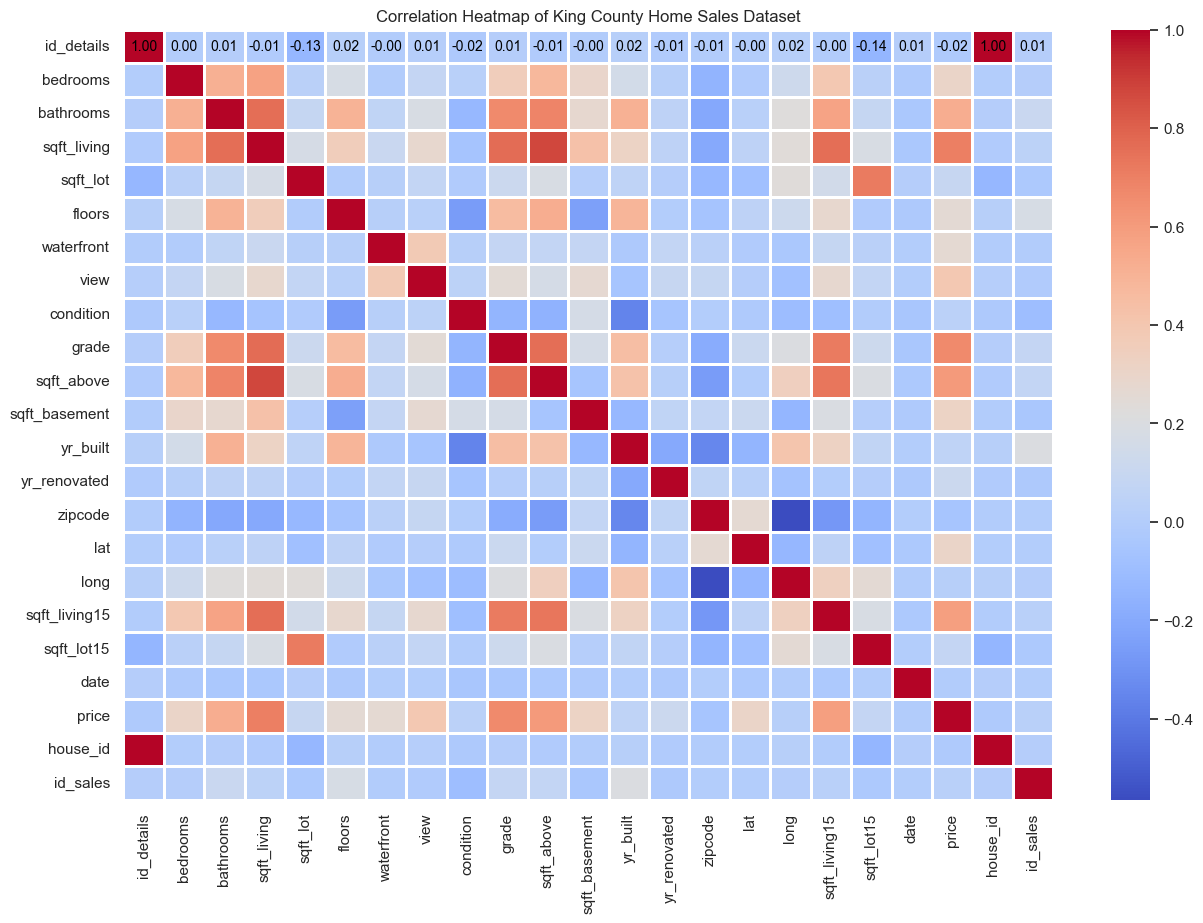

In [75]:
# Let's give a correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = merged_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Generate a heatmap using seaborn with adjustments for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1, fmt=".2f", annot_kws={"size": 10, "color": "black"})

# Add title
plt.title('Correlation Heatmap of King County Home Sales Dataset')

# Display the heatmap
plt.show()

Plotted histograms for continuous columns.

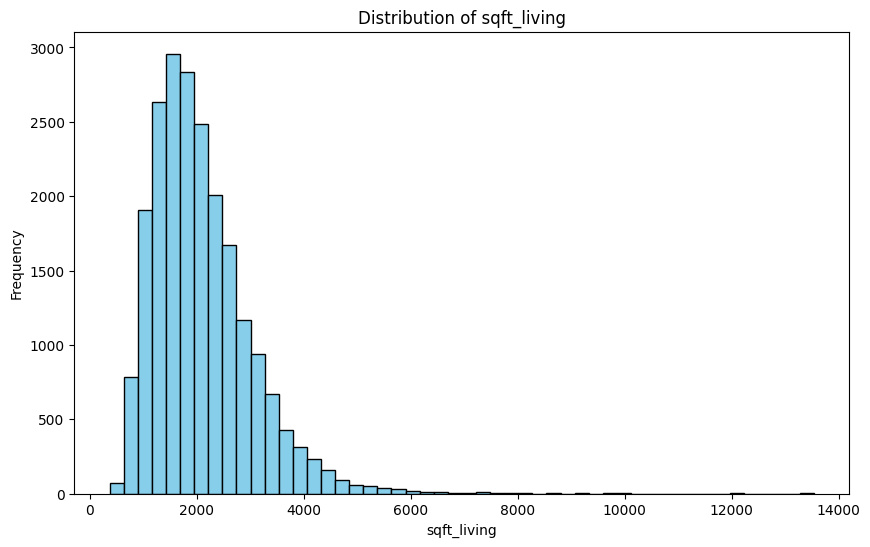

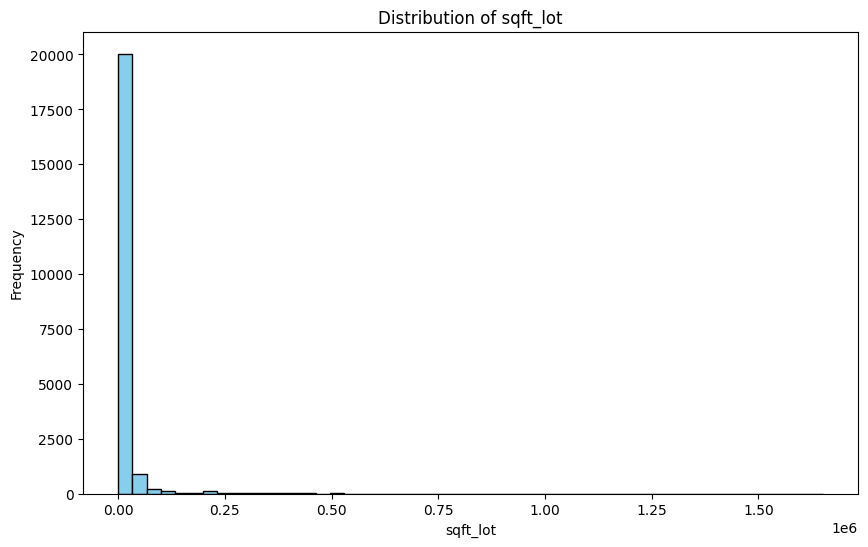

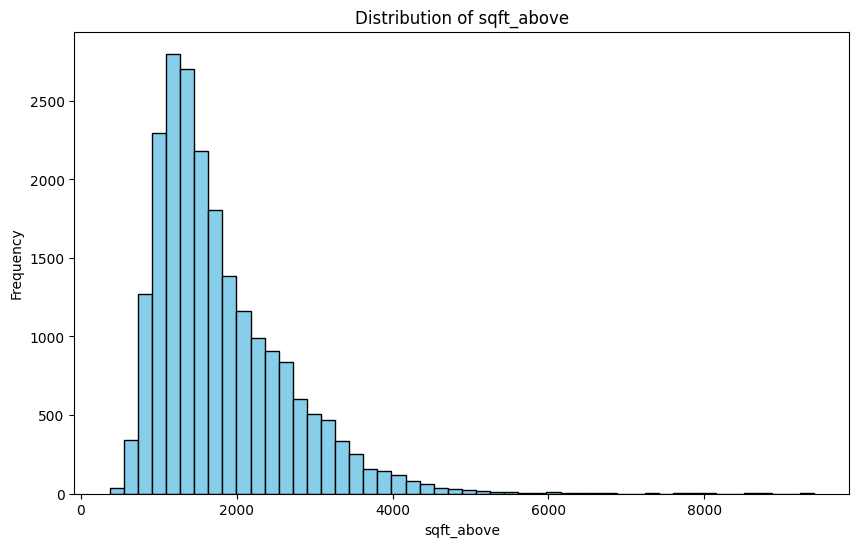

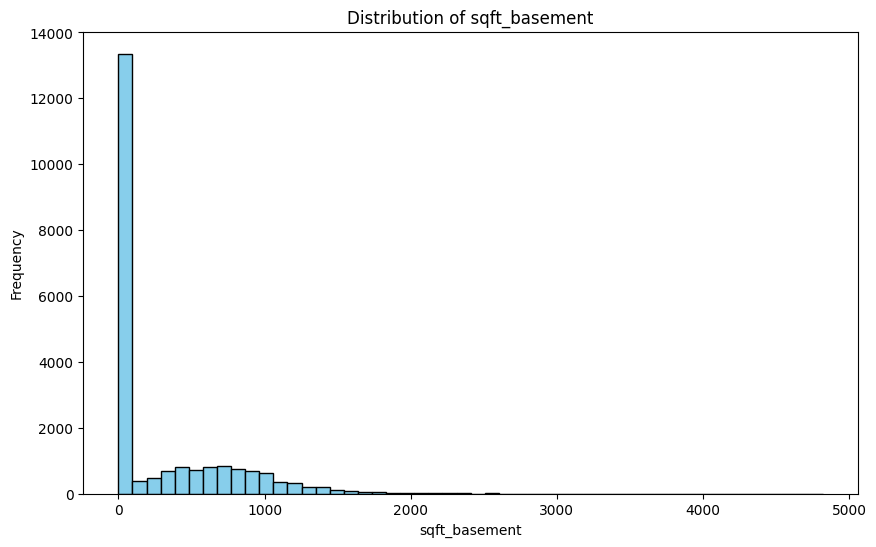

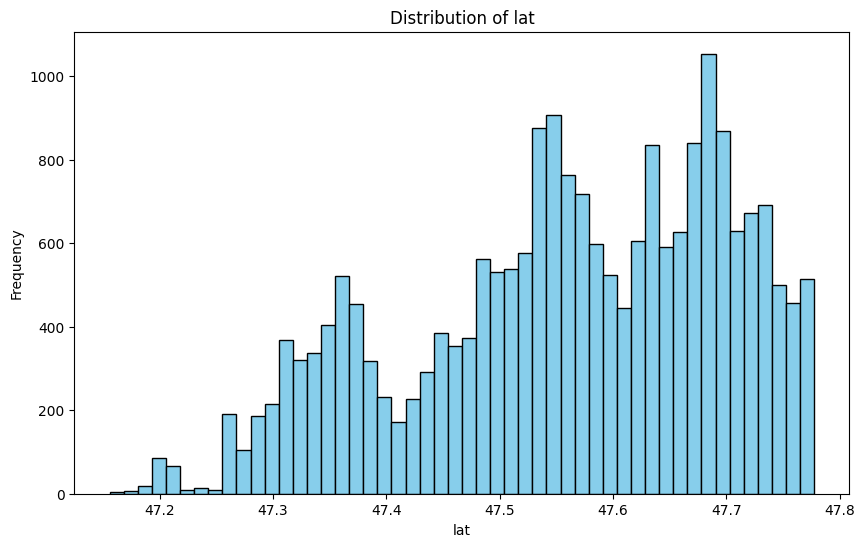

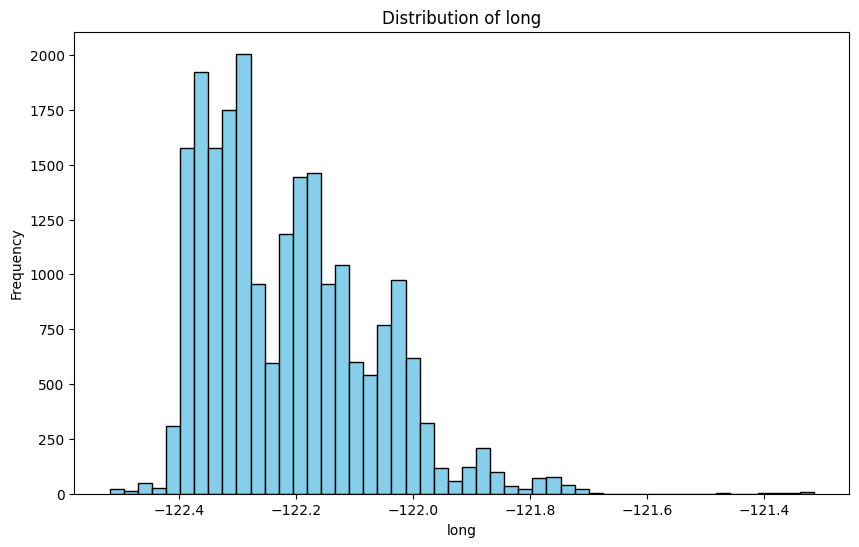

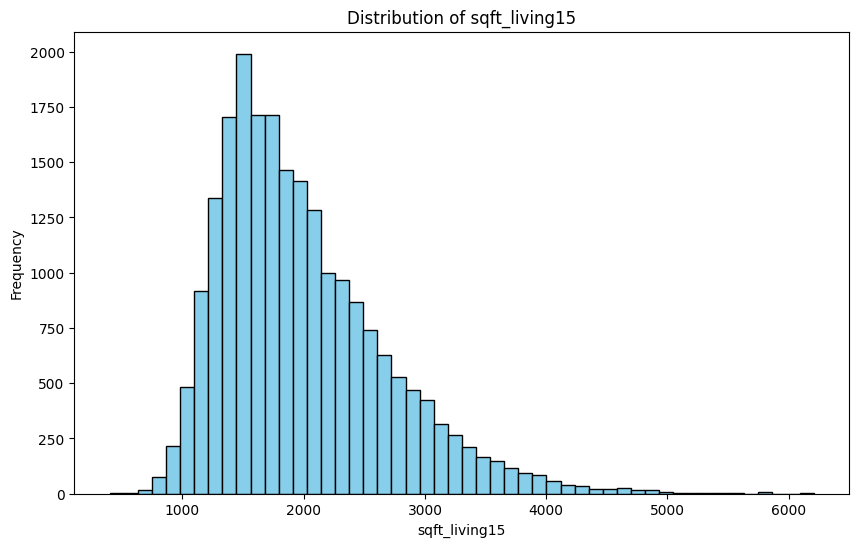

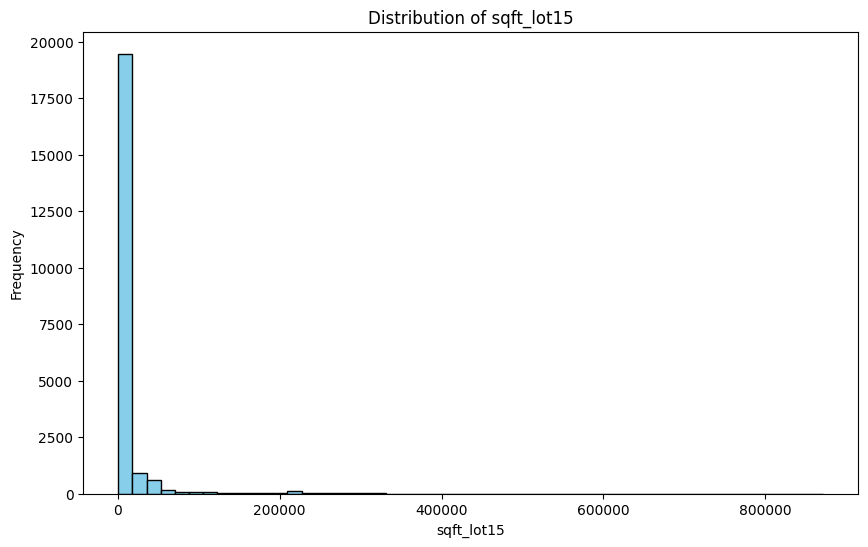

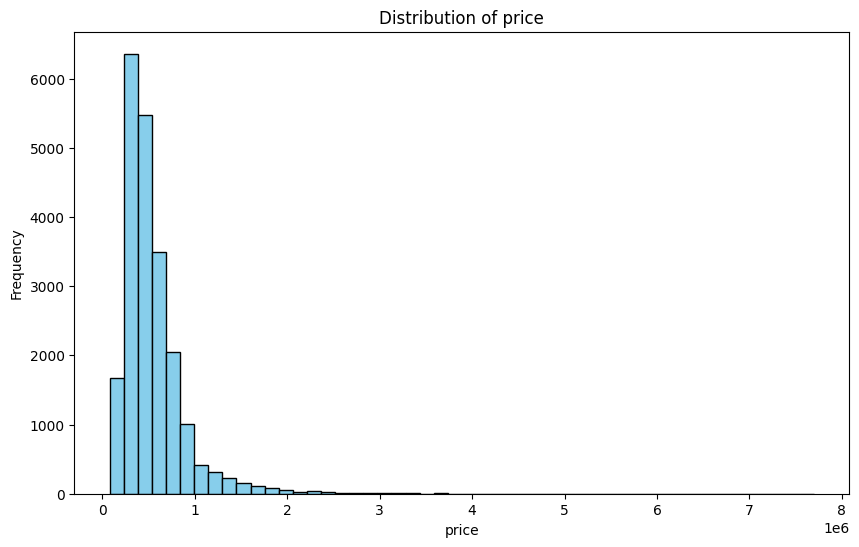

In [24]:
# Let's plot histograms for each of the continuous columns in individual plots

# List of continuous numerical columns
continuous_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']


for column in continuous_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Plotted bar charts for categorical columns.

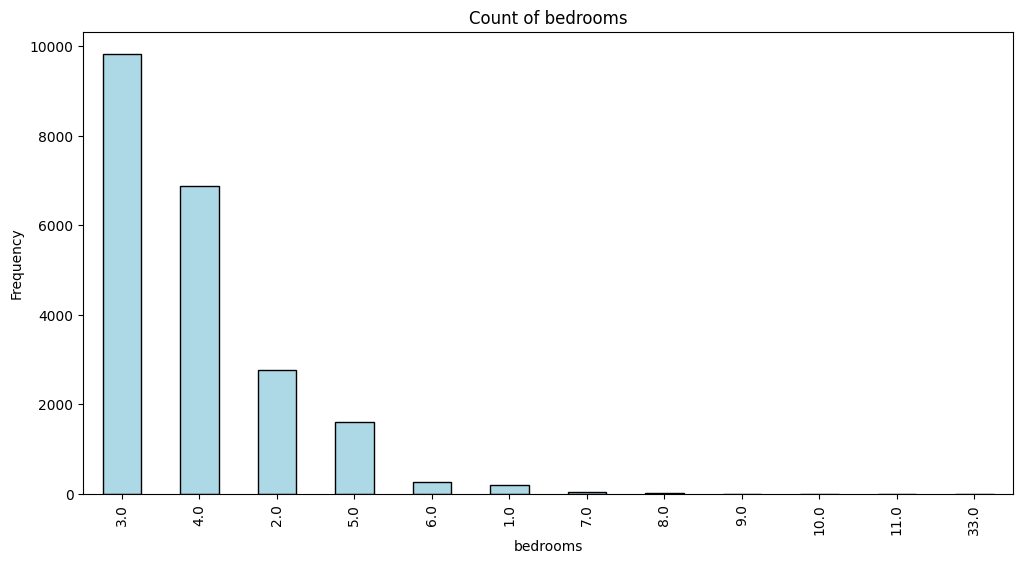

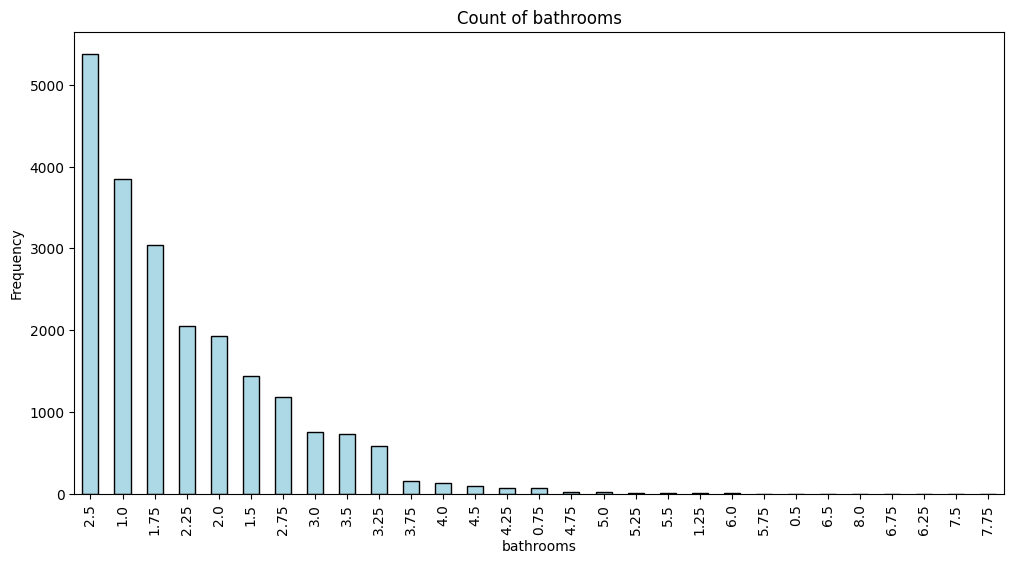

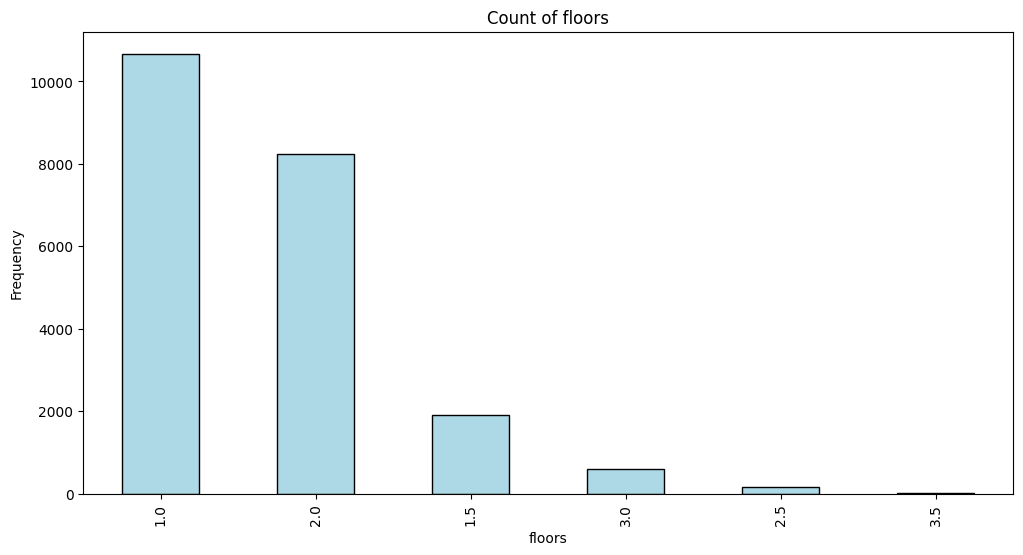

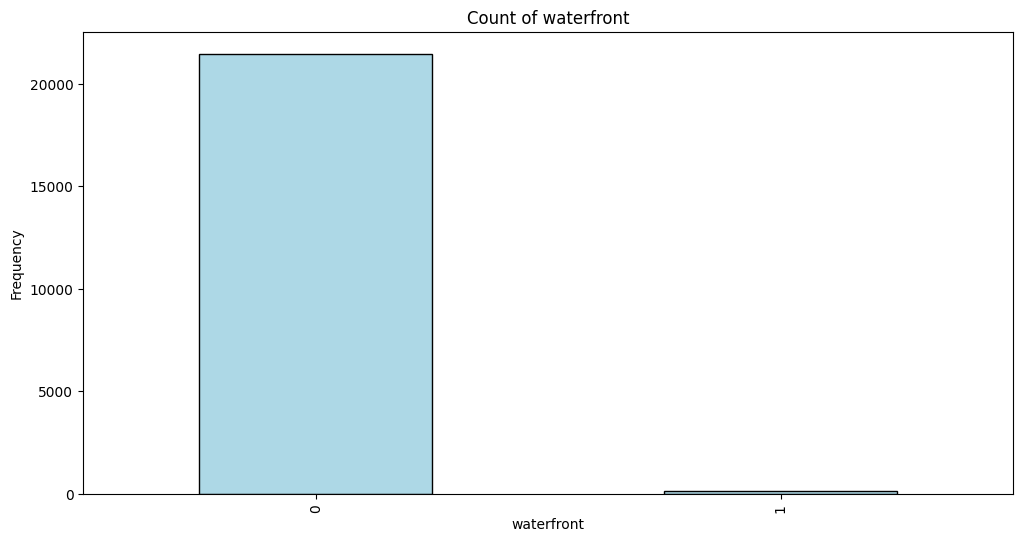

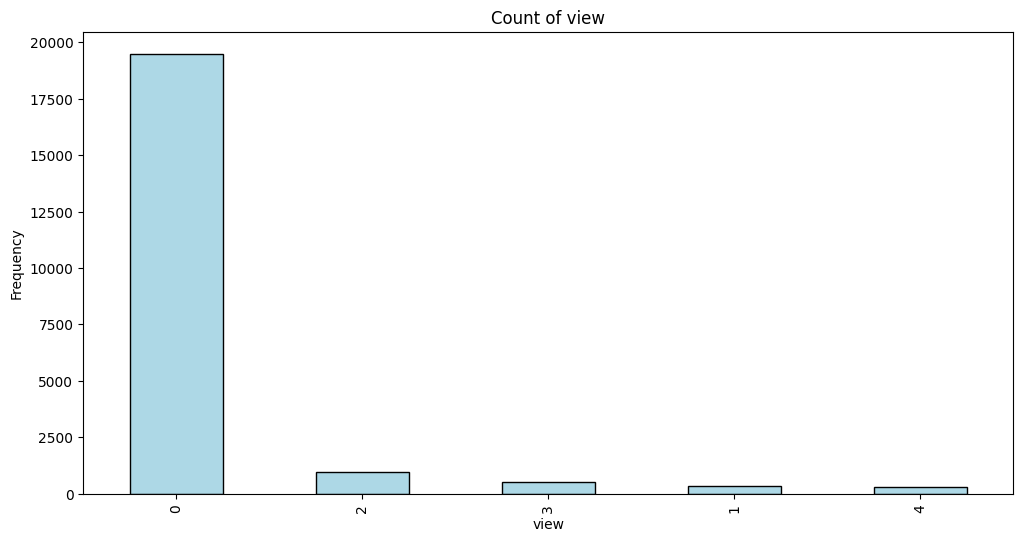

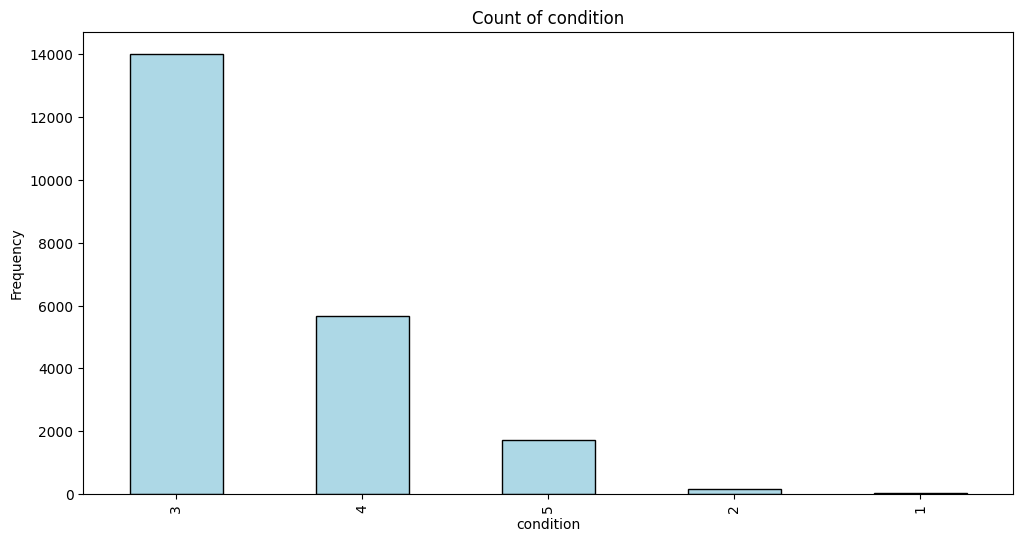

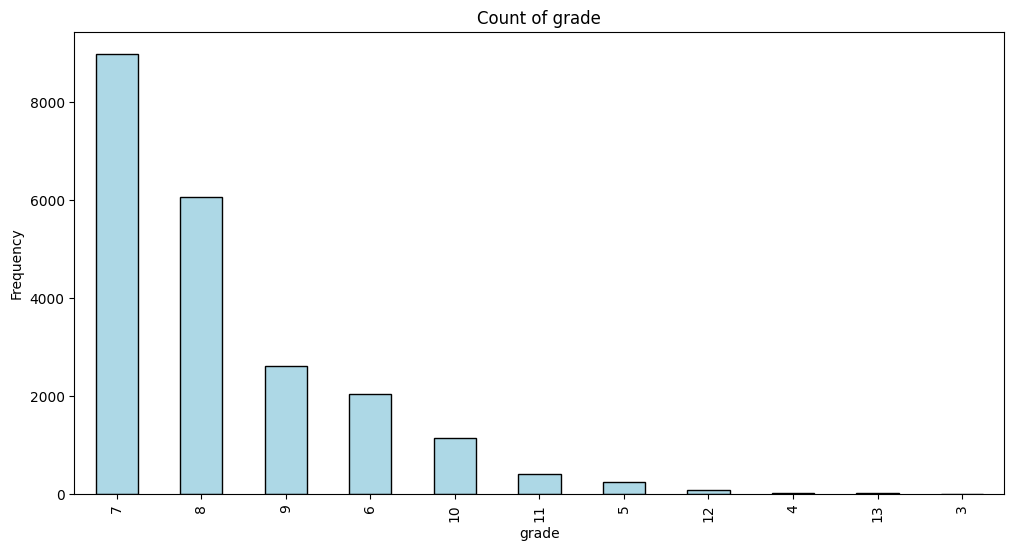

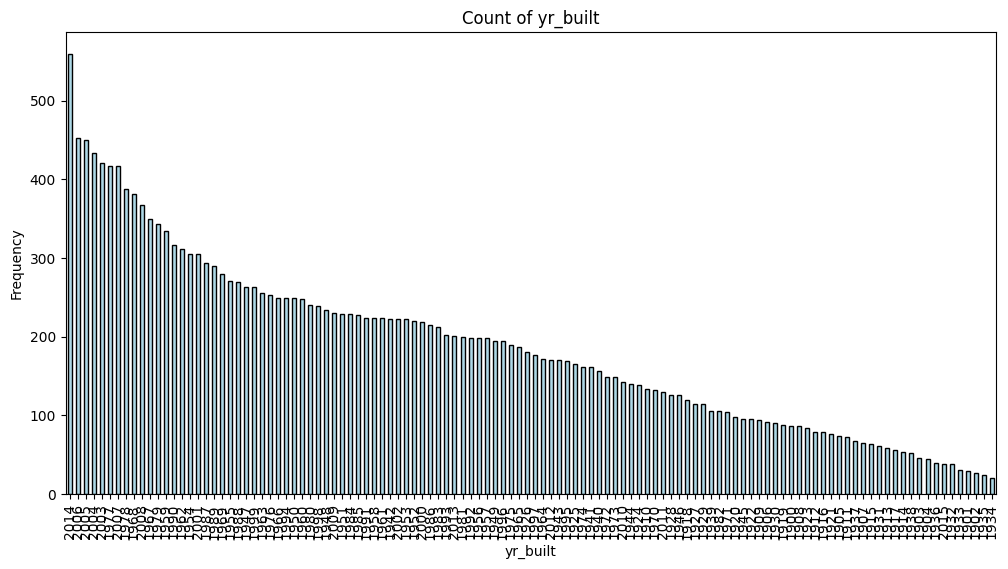

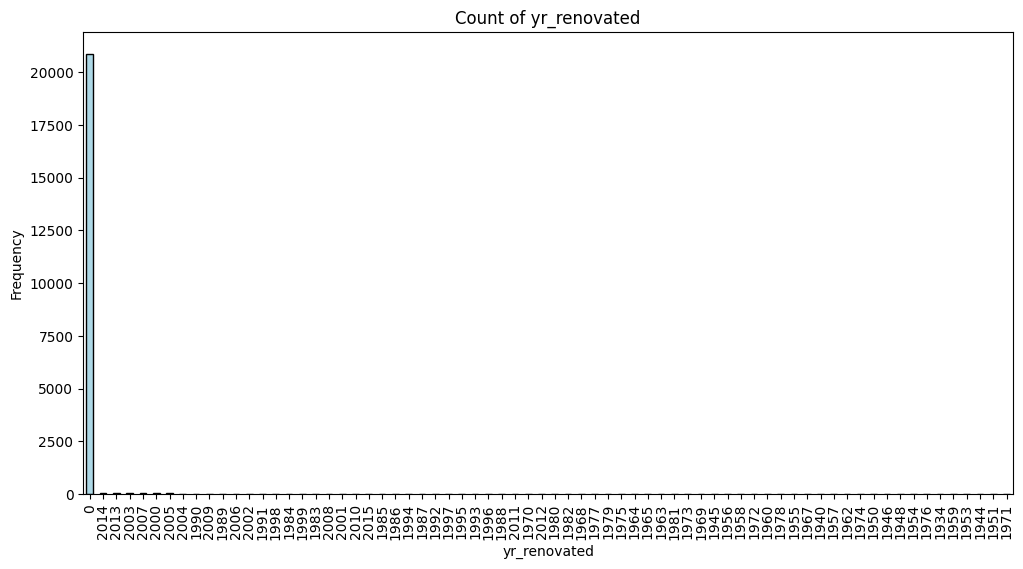

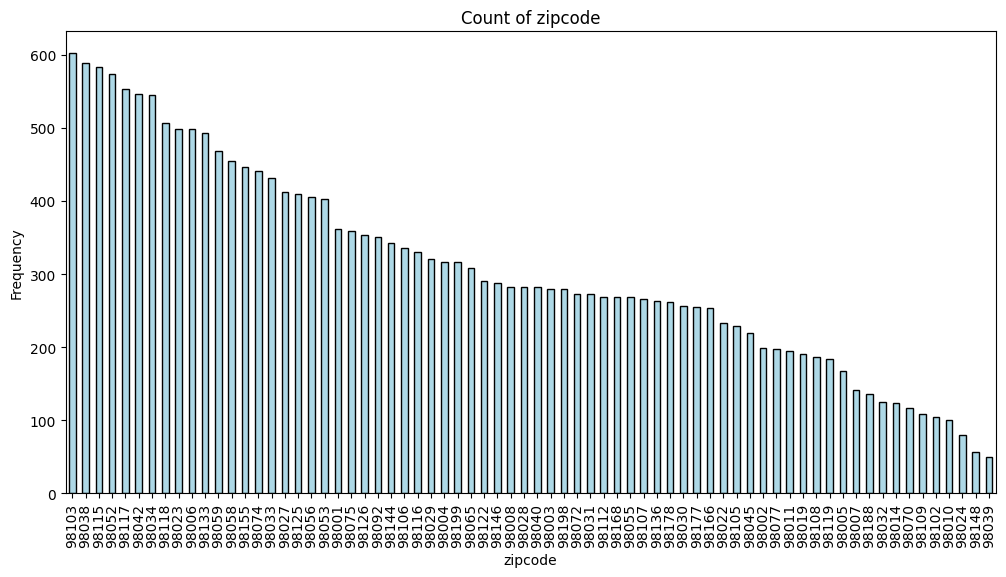

In [25]:
# List of categorical columns
categorical_columns = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']

# Plot bar charts for categorical variables to show counts
for column in categorical_columns:
    # Create a new figure
    plt.figure(figsize=(12, 6))
    
    # Plot bar chart for count of unique values in each categorical variable
    merged_df[column].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
    
    # Set the title and labels
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Display the plot
    plt.show()

Price distribution by docation using plotly

In [26]:
# 1. Insight: Geographical Insight: Price Distribution by Location

import plotly.express as px


# Plot geographical price distribution
fig = px.scatter_mapbox(merged_df, lat='lat', lon='long', color='price',
                        size='price', color_continuous_scale=px.colors.cyclical.IceFire,
                        mapbox_style="carto-positron",
                        title='Geographical Distribution of Home Prices in King County')
fig.show()

fig.write_html('plot_price.html')


Geographical Insight: Price Distribution by Location using Folium

In [ ]:
Geographical Insight: Price Distribution by Location using Folium

import folium
from folium.plugins import MarkerCluster
import pandas as pd


# Initialize the map centered around King County
map_king_county = folium.Map(location=[47.5, -122.2], zoom_start=9, tiles='cartodbpositron')

# Add price markers directly to the map without clustering to ensure visibility when zoomed out
for idx, row in merged_df.iterrows():
    # Set color based on price: higher prices are in red, lower prices in blue
    #color = 'red' if row['price'] > merged_df['price'].median() else 'blue'
    color = 'red' if row['price'] > 3000000 else 'blue'
    folium.CircleMarker(
        location=(row['lat'], row['long']),
        radius=row['price'] / 2e5,  # Adjust radius for better visualization
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=folium.Popup(f"Price: ${row['price']:,}", parse_html=True)
    ).add_to(map_king_county)

# Save map as an HTML file
map_king_county.save('folium_price_distribution.html')


# 1. Insight: How does proximity to specific geographic features, such as waterfronts or central locations, influence house prices in King County?

 * Average Price Comparison: The average price of waterfront properties is significantly higher `1,717,214` compared to non-waterfront properties `532,286`. 
 * This shows that proximity to a waterfront contributes greatly to property value.

 * Geographical Distribution: The scatter plot shows the geographical distribution of houses, with waterfront properties marked distinctly. You can observe that waterfront properties are typically located in specific regions near water bodies, and these tend to have higher prices, as reflected by the larger markers.
 * These visualizations support the hypothesis that **proximity to water significantly influences property prices**.


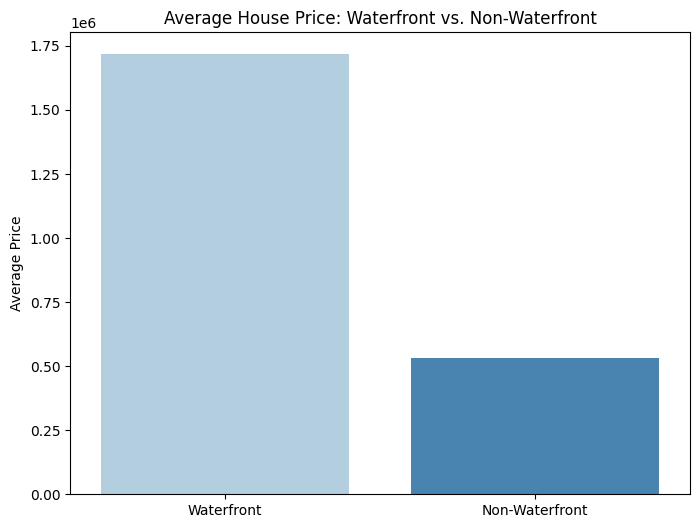

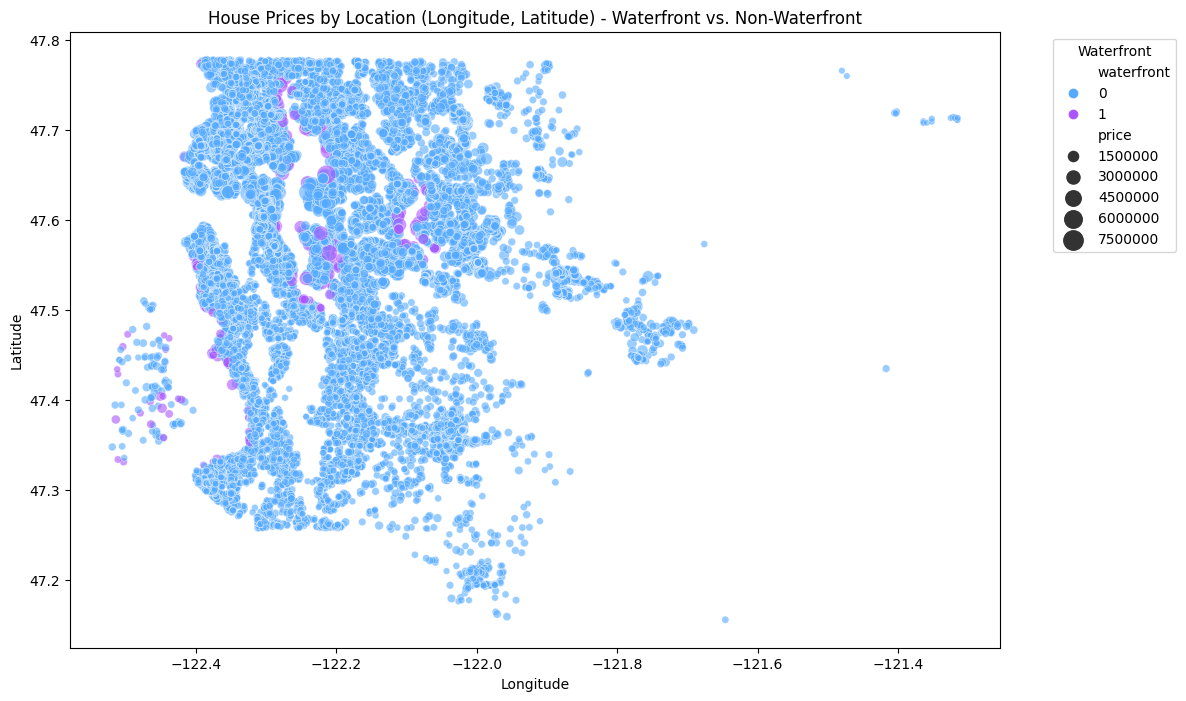

{'Average Price (Waterfront)': 1717214.7260273972,
 'Average Price (Non-Waterfront)': 532286.2219943126}

In [57]:
# 1. Insight: Hypothesis / Research Question
# How does proximity to specific geographic features, 
# such as waterfronts or central locations, influence house prices in King County?

# Average Price Comparison: The average price of waterfront properties is significantly higher ($1,717,214) compared to non-waterfront properties ($532,286). 
#This shows that proximity to a waterfront contributes greatly to property value.

# Geographical Distribution: The scatter plot shows the geographical distribution of houses, with waterfront 
#properties marked distinctly. You can observe that waterfront properties are typically located in specific 
#regions near water bodies, and these tend to have higher prices, as reflected by the larger markers.

# These visualizations support the hypothesis that proximity to water significantly influences property prices.

import matplotlib.pyplot as plt
import seaborn as sns

# Filter properties based on waterfront presence to explore the impact on price
waterfront_properties = merged_df[merged_df['waterfront'] == 1]
non_waterfront_properties = merged_df[merged_df['waterfront'] == 0]

# Calculate average prices for waterfront and non-waterfront properties
avg_price_waterfront = waterfront_properties['price'].mean()
avg_price_non_waterfront = non_waterfront_properties['price'].mean()

# Visualize the average price comparison for waterfront vs non-waterfront properties
plt.figure(figsize=(8, 6))
sns.barplot(x=['Waterfront', 'Non-Waterfront'], y=[avg_price_waterfront, avg_price_non_waterfront], palette='Blues')
plt.title('Average House Price: Waterfront vs. Non-Waterfront')
plt.ylabel('Average Price')
plt.show()

# Visualize geographical distribution of house prices with waterfront vs. non-waterfront differentiation
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df, x='long', y='lat', hue='waterfront', size='price', sizes=(20, 200), alpha=0.6, palette='cool')
plt.title('House Prices by Location (Longitude, Latitude) - Waterfront vs. Non-Waterfront')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Waterfront')
plt.show()

# Summary of price impact based on geographical location
price_impact_summary = {
    'Average Price (Waterfront)': avg_price_waterfront,
    'Average Price (Non-Waterfront)': avg_price_non_waterfront
}
price_impact_summary

# 2. Insight: Renovations are very impactful across all grades but particularly beneficial for medium and high-grade properties.

 % change between renovated and not renovated grade_categories: Low Grade: 18.20 - Medium Grade: 44.27 - High Grade: 52.66

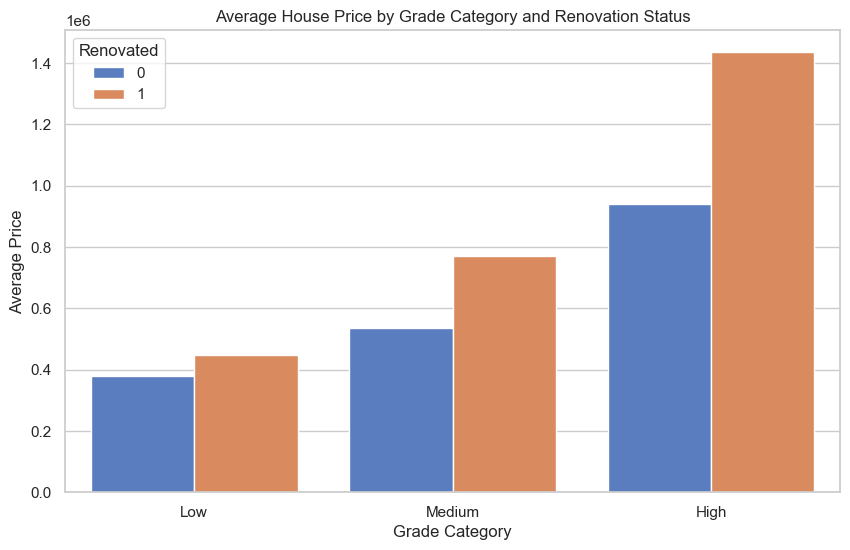

grade_category
Low      18.203
Medium   44.277
High     52.656
Name: price, dtype: float64

In [68]:
# 2. Insight: Renovations are very impactful across all grades but particularly beneficial for medium and high-grade properties.

# Create a series to indicate if the house was renovated (1 if renovated, 0 otherwise) without modifying the original dataframe
was_renovated = merged_df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Create grade categories based on quantiles
grade_category = pd.qcut(merged_df['grade'], q=3, labels=['Low', 'Medium', 'High'])

# Combine data into a new DataFrame for grouping without changing the original dataframe
data_for_renovation_analysis = pd.DataFrame({
    'was_renovated': was_renovated,
    'grade_category': grade_category,
    'price': merged_df['price']
})

# Group by grade category and renovation status to calculate average price
avg_price_by_grade_renovation = data_for_renovation_analysis.groupby(['grade_category', 'was_renovated'])['price'].mean().reset_index()

# Plot average price by grade category and renovation status using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_grade_renovation, x='grade_category', y='price', hue='was_renovated', palette='muted')
plt.title('Average House Price by Grade Category and Renovation Status')
plt.xlabel('Grade Category')
plt.ylabel('Average Price')
plt.legend(title='Renovated')
plt.show()


# Calculate the average price for renovated and non-renovated properties in each grade category
avg_price_renovated = data_for_renovation_analysis[data_for_renovation_analysis['was_renovated'] == 1].groupby('grade_category')['price'].mean()
avg_price_non_renovated = data_for_renovation_analysis[data_for_renovation_analysis['was_renovated'] == 0].groupby('grade_category')['price'].mean()

# Calculate the percentage increase in average price for renovated properties compared to non-renovated ones for each grade category
price_increase_percentage = ((avg_price_renovated - avg_price_non_renovated) / avg_price_non_renovated) * 100

# Display the percentage increase for each grade category
price_increase_percentage

# 3. Insight: Does the number of floors in a property influence its sale price, and how does this effect vary across different property grades?

 * Properties with more floors generally have a higher average price. 
 * High-grade properties consistently have a higher average price regardless of the number of floors.
 * For low and medium-grade properties, the average price increases with the number of floors, but at a slower rate compared to high-grade properties.


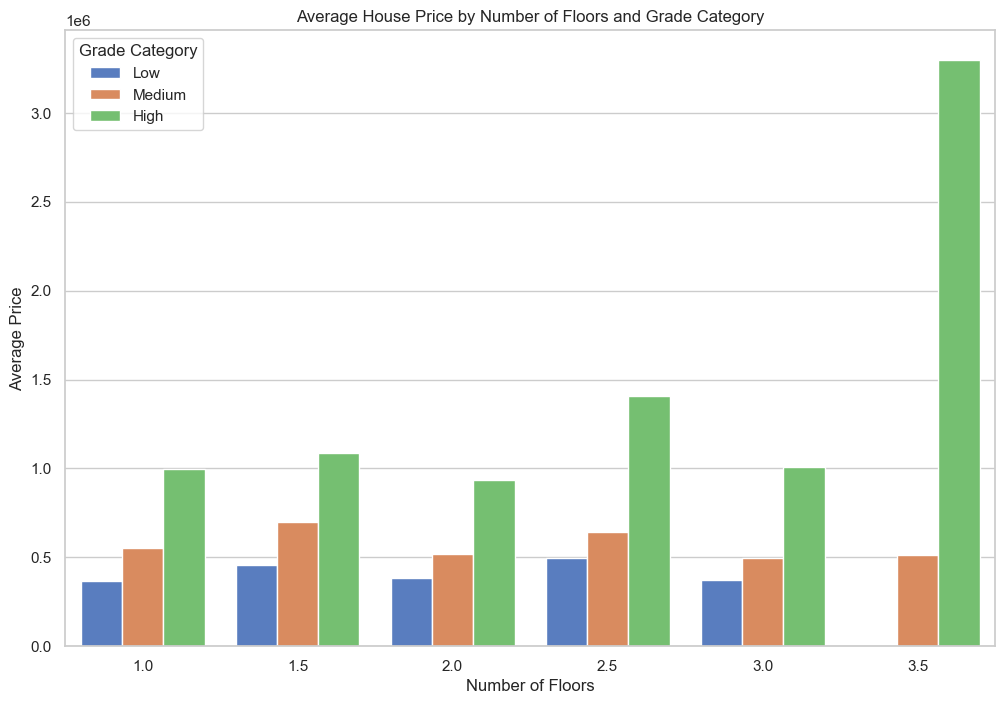

In [74]:
# 3. Insight: Does the number of floors in a property influence its sale price, 
# and how does this effect vary across different property grades?

# Properties with more floors generally have a higher average price. 
# High-grade properties consistently have a higher average price regardless of the number of floors.
# For low and medium-grade properties, the average price increases with the number of floors, 
#but at a slower rate compared to high-grade properties.

# Create grade categories based on quantiles without modifying the dataframe
grade_category = pd.qcut(merged_df['grade'], q=3, labels=['Low', 'Medium', 'High'])

# Combine data into a new DataFrame for analysis without modifying the original dataframe
data_for_floors_analysis = pd.DataFrame({
    'floors': merged_df['floors'],
    'grade_category': grade_category,
    'price': merged_df['price']
})

# Group by number of floors and grade category to calculate the average price
avg_price_by_floors_grade = data_for_floors_analysis.groupby(['floors', 'grade_category'])['price'].mean().reset_index()

# Plot average price by number of floors and grade category using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_price_by_floors_grade, x='floors', y='price', hue='grade_category', palette='muted')
plt.title('Average House Price by Number of Floors and Grade Category')
plt.xlabel('Number of Floors')
plt.ylabel('Average Price')
plt.legend(title='Grade Category')
plt.show()



# 1. Recommendation for a Home Seller Client
 
 * Top 10% Central Houses: These houses are in the highest price bracket, typically large with higher numbers of bedrooms and bathrooms.
 * Average-Priced Houses: These properties fall into a more average price range, suitable for discreet purchases.


Summary of Top 10% Central Houses:
          id_details  bedrooms  bathrooms  sqft_living   sqft_lot   floors  \
count       2161.000  2161.000   2161.000     2161.000   2161.000 2161.000   
mean  4246407508.064     4.018      3.024     3566.449  23463.626    1.789   
min     31000165.000     1.000      1.000     1140.000    609.000    1.000   
25%   1818800235.000     3.000      2.500     2820.000   6350.000    1.500   
50%   3629921000.000     4.000      3.000     3450.000  10260.000    2.000   
75%   6790830060.000     4.000      3.500     4133.000  17833.000    2.000   
max   9839301165.000    10.000      8.000    13540.000 982998.000    3.500   
std   2844364798.400     0.892      0.849     1138.207  60856.669    0.485   

       waterfront     view  condition    grade  ...  yr_renovated   zipcode  \
count    2161.000 2161.000   2161.000 2161.000  ...      2161.000  2161.000   
mean        0.049    1.011      3.460    9.512  ...       178.561 98069.752   
min         0.000    0.00

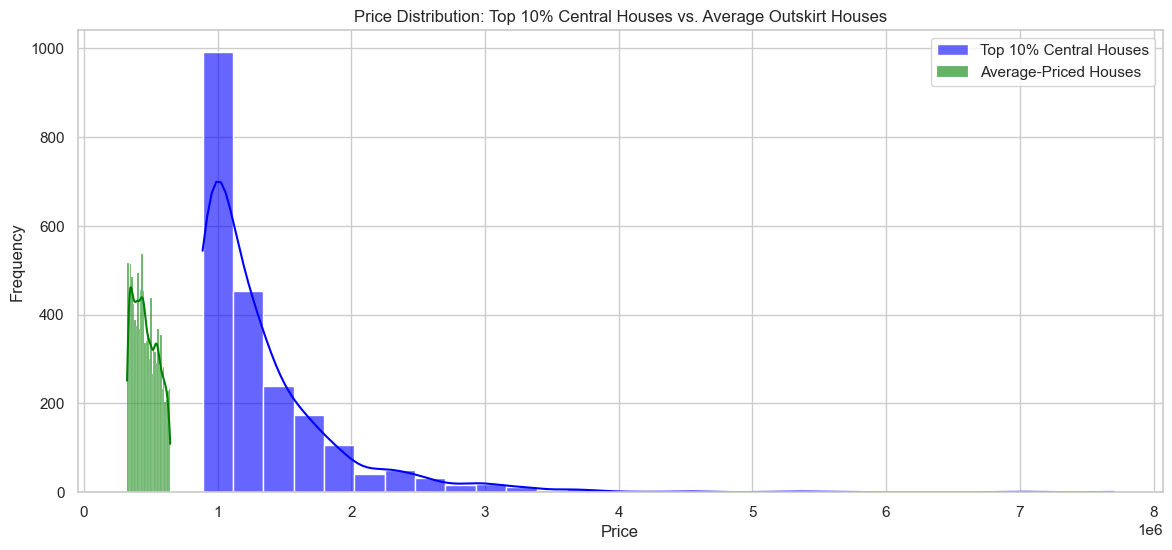

In [69]:
# Recommendations for a Home Seller
# 1. Top 10% Central Houses: These houses are in the highest price bracket, 
#typically large with higher numbers of bedrooms and bathrooms.
#Average-Priced Houses: These properties fall into a more average price range, suitable for discreet purchases.

# Define price threshold for top 10% of properties
top_10_percent_price_threshold = merged_df['price'].quantile(0.90)

# Filter for central houses in the top 10% price range
top_10_percent_houses = merged_df[merged_df['price'] >= top_10_percent_price_threshold]

# Filter for average-priced houses (middle 50%)
avg_price_thresholds = merged_df['price'].quantile([0.25, 0.75])
average_outskirt_houses = merged_df[
    (merged_df['price'] >= avg_price_thresholds.iloc[0]) & 
    (merged_df['price'] <= avg_price_thresholds.iloc[1])
]

# Summary statistics for top 10% central houses
print("Summary of Top 10% Central Houses:")
print(top_10_percent_houses.describe())

# Summary statistics for average-priced houses
print("\nSummary of Average-Priced Outskirt Houses:")
print(average_outskirt_houses.describe())

# Plot distribution of prices for top 10% central houses and average-priced houses
plt.figure(figsize=(14, 6))

# Top 10% houses price distribution
sns.histplot(top_10_percent_houses['price'], bins=30, kde=True, color='blue', label='Top 10% Central Houses', alpha=0.6)

# Average-priced houses price distribution
sns.histplot(average_outskirt_houses['price'], bins=30, kde=True, color='green', label='Average-Priced Houses', alpha=0.6)

plt.title('Price Distribution: Top 10% Central Houses vs. Average Outskirt Houses')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 2. Recommendation for a Home Seller Client

* Top 10% Central Houses tend to have slightly better condition on average compared to the average-priced houses in the outskirts. This might imply less need for repairs or renovations for top-value properties.

In [71]:
# Recommendations for a Home Seller
# 2. Condition of Top 10% Central Houses vs. Average Outskirt Houses

#Top 10% Central Houses tend to have slightly better condition on average compared to the average-priced houses 
#in the outskirts. This might imply less need for repairs or renovations for top-value properties.

# Average condition of top 10% central houses
avg_condition_top_10 = top_10_percent_houses['condition'].mean()

# Average condition of average-priced outskirt houses
avg_condition_outskirts = average_outskirt_houses['condition'].mean()

print(f"Average Condition (Top 10% Central Houses): {avg_condition_top_10:.2f}")
print(f"Average Condition (Average-Priced Outskirt Houses): {avg_condition_outskirts:.2f}")



Average Condition (Top 10% Central Houses): 3.46
Average Condition (Average-Priced Outskirt Houses): 3.38


# 3. Recommendation for a Home Seller Client

 * Number of Bathrooms in Top 10% Central Houses vs. Average Outskirt Houses: 
   * Top 10% Central Houses generally have more bathrooms compared to average-priced outskirt houses. 

In [73]:
# Recommendations for a Home Seller
# 3. Number of Bathrooms in Top 10% Central Houses vs. Average Outskirt Houses
#Top 10% Central Houses generally have more bathrooms compared to average-priced outskirt houses. 

# Average number of bathrooms for top 10% central houses
avg_bathrooms_top_10 = top_10_percent_houses['bathrooms'].mean()

# Average number of bathrooms for average-priced outskirt houses
avg_bathrooms_outskirts = average_outskirt_houses['bathrooms'].mean()

print(f"Average Number of Bathrooms (Top 10% Central Houses): {avg_bathrooms_top_10:.2f}")
print(f"Average Number of Bathrooms (Average-Priced Outskirt Houses): {avg_bathrooms_outskirts:.2f}")


Average Number of Bathrooms (Top 10% Central Houses): 3.02
Average Number of Bathrooms (Average-Priced Outskirt Houses): 2.06


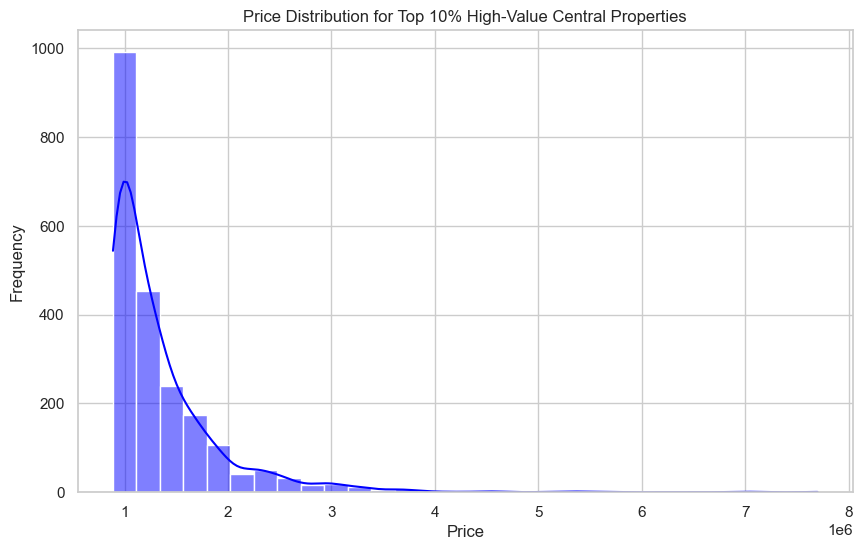

In [72]:
price_threshold = df['price'].quantile(0.90)
central_houses = df[df['price'] >= price_threshold]

plt.figure(figsize=(10, 6))
sns.histplot(central_houses['price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution for Top 10% High-Value Central Properties')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

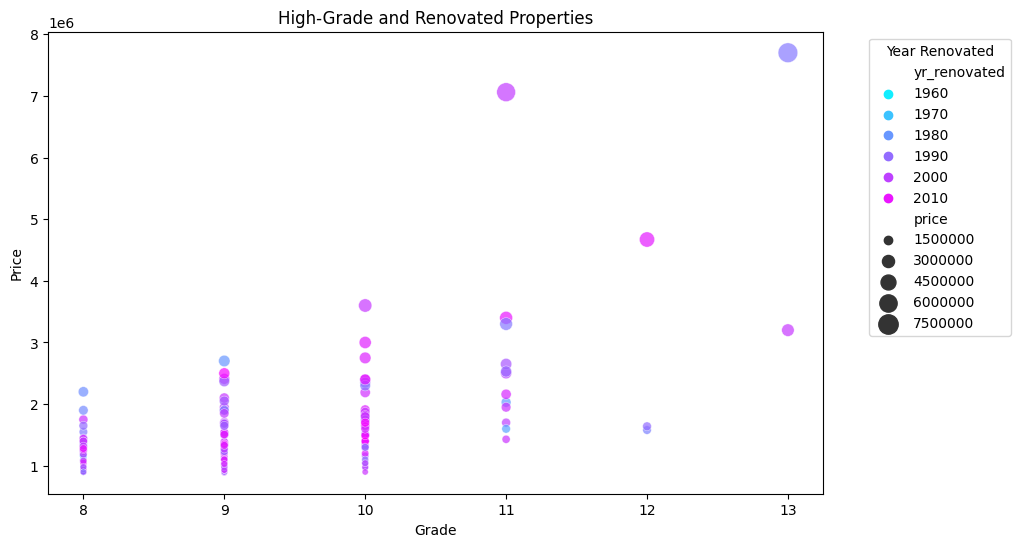

In [31]:
import seaborn as sns

# Filter for high-grade and renovated properties
high_grade_renovated = central_houses[(central_houses['grade'] > df['grade'].mean()) & (central_houses['yr_renovated'] > 0)]

# Create scatter plot with corrected renovation years as a categorical hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=high_grade_renovated, x='grade', y='price', hue='yr_renovated', palette='cool', size='price', sizes=(20, 200), alpha=0.7)
plt.title('High-Grade and Renovated Properties')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Year Renovated')
plt.show()

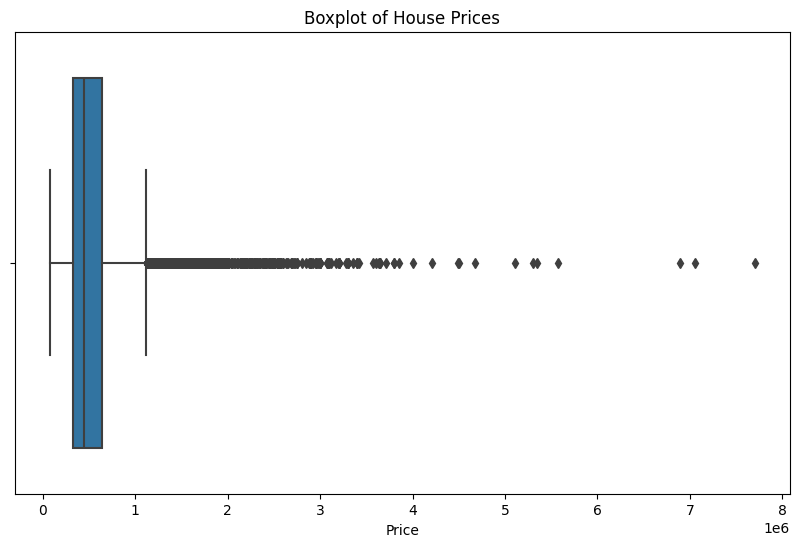

In [32]:
# Dealing with outliers
# It's crucial to identify if there are any outliers in the price data. 
# We can use several techniques to do this: Boxplot Visualization: 
# Boxplots are great tools for visualizing potential outliers 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='price')
plt.title('Boxplot of House Prices')
plt.xlabel('Price')
plt.show()

#The points that lie beyond the "whiskers" of the boxplot can be considered as potential outliers.

In [49]:
# Quantile-based Analysis: Calculate specific quantiles to identify extreme values. You can define thresholds based on these percentiles.

q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

lower_bound = max(0, q1 - 1.5 * iqr)
upper_bound = q3 + 1.5 * iqr

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Outliers based on the IQR method
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")


Lower Bound: 0, Upper Bound: 1129500.0
Number of Outliers: 1158


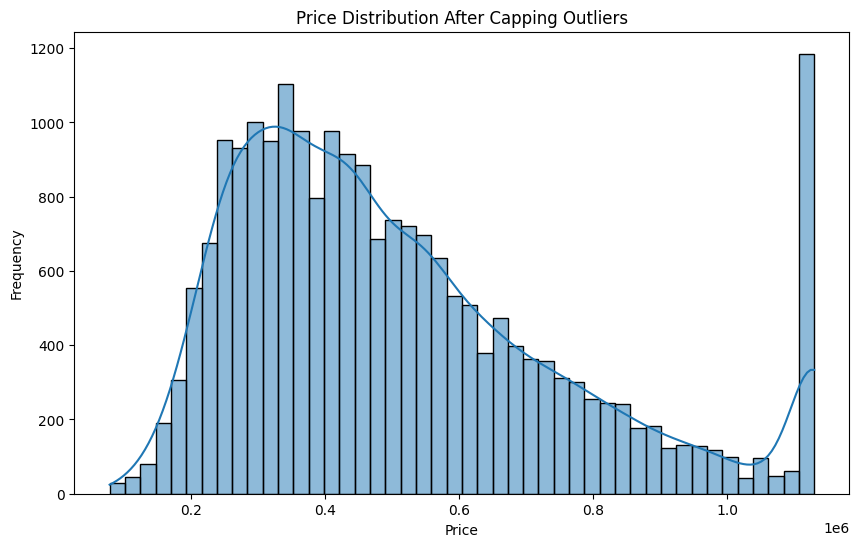

In [50]:
# Cap outliers for analysis only, without creating a new column
price_capped = df['price'].clip(lower=lower_bound, upper=upper_bound)

# Plot the capped price distribution without modifying the original DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(price_capped, kde=True)
plt.title('Price Distribution After Capping Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

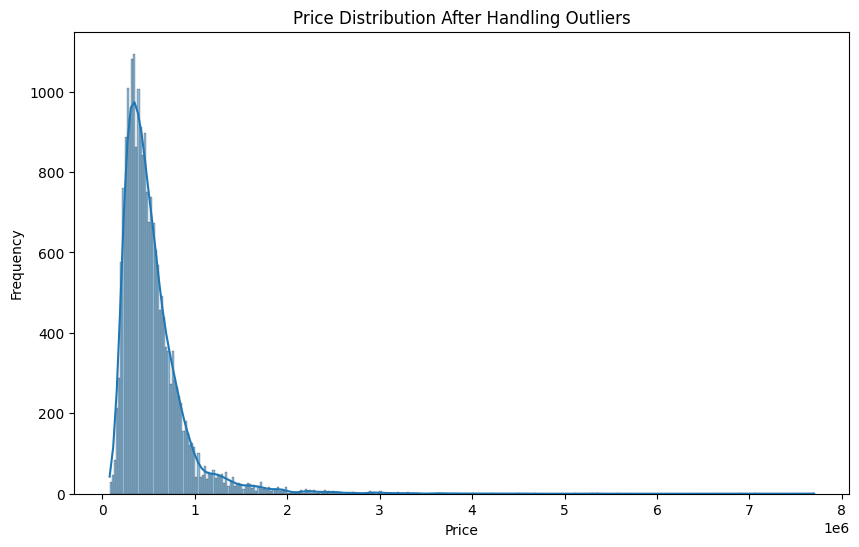

In [46]:
# Plot the distribution of prices after handling outliers
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['price'], kde=True)
plt.title('Price Distribution After Handling Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

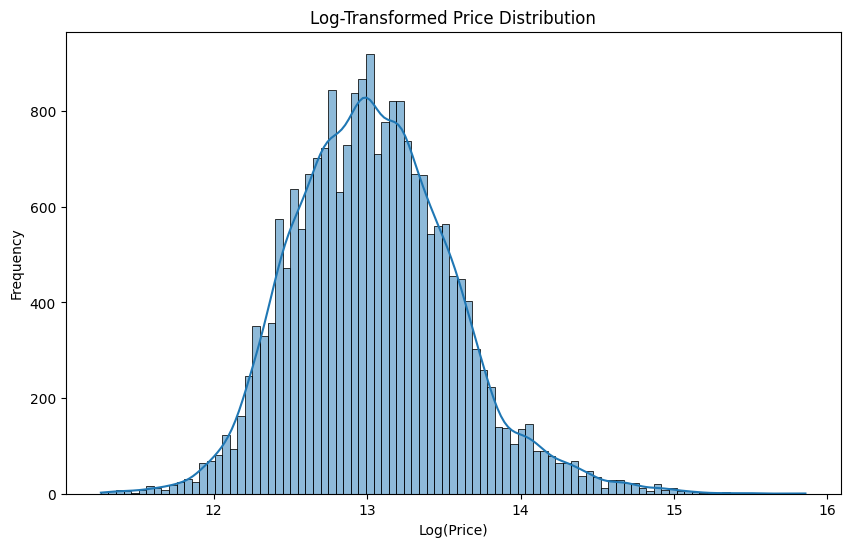

In [37]:
import numpy as np

# Apply log transformation to price
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply log transformation to 'price' for plotting only
log_price = np.log(df['price'] + 1)  # Adding 1 to avoid log(0)

# Plot the log-transformed price distribution without adding a new column to the dataframe
plt.figure(figsize=(10, 6))
sns.histplot(log_price, kde=True)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64


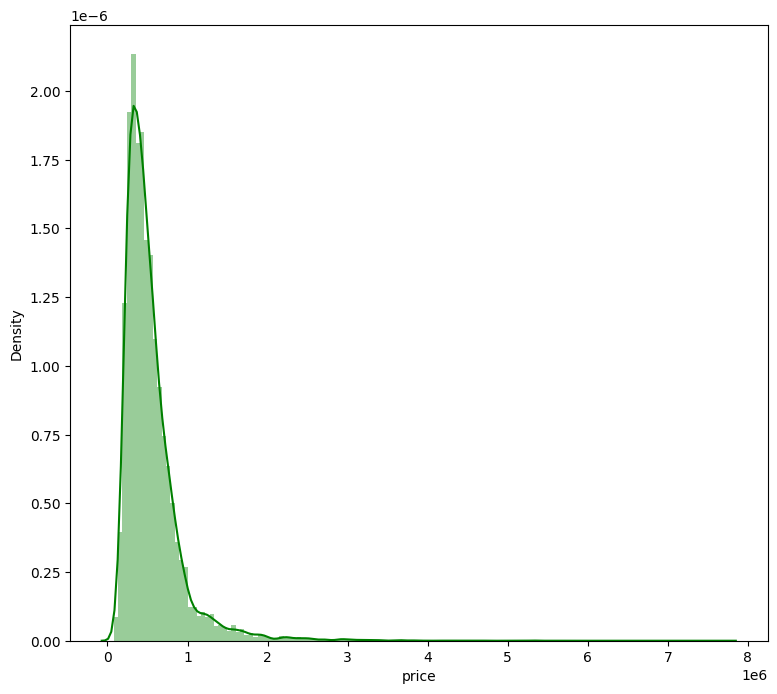

In [47]:
#Prices are skewed right and some outliers lies above 1M


print(merged_df['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(merged_df['price'], color='g', bins=140, hist_kws={'alpha': 0.4});

In [76]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: nbconvert in c:\users\onur_\bootcamp\eda_project\.venv\lib\site-packages (7.16.4)




[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
!jupyter nbconvert --to html EDA.ipynb

[NbConvertApp] Converting notebook EDA.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 32 image(s).
[NbConvertApp] Writing 7285233 bytes to EDA.html
